In [65]:
#resultado da instalação das bibliotecas não será exibido diretamente na tela
%%capture
#instala a biblioteca qiskit e o visualizador de circuitos na versão 1.2.2
!pip install qiskit[visualization]==1.2.2
#permite rodar seus circuitos quânticos em seu próprio computador
!pip install qiskit_aer
#conectar aos computadores quânticos da IBM e executar os circuitos
!pip install qiskit_ibm_runtime
#criar gráficos e visualizações. 
!pip install matplotlib

UsageError: Line magic function `%%capture` not found.


In [67]:
import qiskit
#QuantumRegister: Representa um registro de qubits;
#ClassicalRegister: Representa um registro de bits clássicos;
#QuantumCircuit: Representa um circuito quântico.
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
#biblioteca para cálculos numéricos.
from numpy import pi
#importa funções matemáticas: sqrt = Raiz Quadrada.
from math import sqrt
#o módulo quantum_info calcula probabilidades e simula operações quânticas.
import qiskit.quantum_info as qi
#visualização de resultados na forma de histogramas.
from qiskit.visualization import plot_histogram


In [69]:
#cria um um conjunto de qubits que podemos manipular(registro quântico).
q = QuantumRegister(1, 'q')
#cria um circuito quântico com 1 qubit.
circuito = QuantumCircuit(1)
#amplitudes de probabilidade de um estado quântico.
α = 1/sqrt(2)
β = 1/sqrt(2)
#o vetor ψ é uma superposição dos estados |0⟩ e |1⟩ com probabilidades iguais.
ψ = [α, β]
#inicializa o qubit q[0] no estado ψ.
circuito.initialize(ψ, q[0])


In [71]:
# calcula o estado final do sistema após todas as operações definidas no circuito.
ψ = qi.Statevector(circuito)
ψ
#resultado: vetor de amplitudes de probabilidade de |0⟩ e |1⟩, em um sistema de 2 dimensões.

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [73]:
#probabilidades de obter cada resultado possível ao medir o qubit
probs = ψ.probabilities()
print(probs)
#resultado: há 50% de chance de medir o qubit no estado |0⟩ e 50% de chance de medir o qubit no estado |1⟩ (superposição).

[0.5 0.5]


In [75]:
#simula a medição do qubit no estado ψ, 1024 vezes.
counts = ψ.sample_counts(shots=1024)
print(counts)
#resultado: O resultado '0' foi obtido aproximadamente X vezes e o '1' foi obtido Y vezes(valores próximos).

{'0': 513, '1': 511}


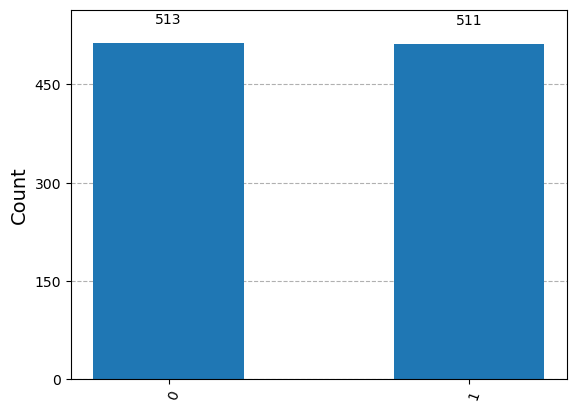

In [77]:
plot_histogram(counts)

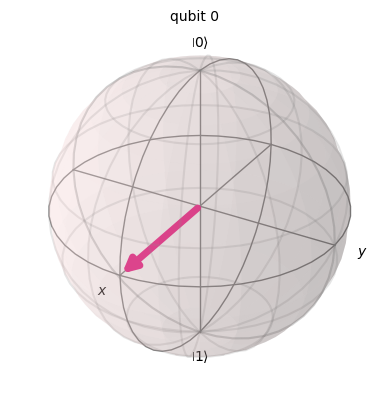

In [79]:
ψ.draw('bloch')


**Porta Hadamard no circuito**


In [82]:
#novo circuito quântico com um qubit - porta de Hadamard.
qc2 = QuantumCircuit(1)
qc2.h(0)
# qc2.draw('mpl') - desenha o circuito
#mesmo processo